This program was using GraphSAGE to graph all the molecules but does not have the updated code for molecule labels. Please see the updated notebook at GraphSAGE on all molecules.ipynb 

# Getting graph from corpus
---



# Loading in all Sentences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Extracted Sentences/"

In [ ]:
import json

In [ ]:
with open(MODEL_PATH + "all_years_array.json", "r") as f:
    all_docs = json.load(f)

In [ ]:
len(all_docs)

700

In [ ]:
all_docs_1D = [j for sub in all_docs for j in sub]

In [ ]:
len(all_docs_1D)

755496

In [ ]:
keyword = "pten"
found_sentences = [] 

for sentence in all_docs_1D:
  if keyword in sentence:
    found_sentences.append(sentence)

In [ ]:
len(found_sentences)

660

# Defining Molecules and Labels

In [ ]:
molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]

In [ ]:
import pandas as pd
new_molecules_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Named_Entity_Recognition/Abrv_Curated.csv", header=None)
new_molecules_df

,0,1,2,3,4,5
0,pi,phosphatidylinositol,NaN,NaN,NaN,NaN
1,pe,phosphatidylethanolamine,NaN,NaN,NaN,NaN
2,sm,sphingomyelin,NaN,NaN,NaN,NaN
3,hrp,horseradish peroxidase,NaN,NaN,NaN,NaN
4,ritc,rhodamine isothiocyanate,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1075,ma,methacrylate,NaN,NaN,NaN,NaN
1076,moetacl,hema-2[2-(methacryloyloxy)ethyl]trimethylammon...,NaN,NaN,NaN,NaN
1077,th-,tyrosine hydroxylase-,NaN,NaN,NaN,NaN
1078,phb,poly-beta-hydroxybutyrate,NaN,NaN,NaN,NaN


In [ ]:
molecules = molecules + list(set(new_molecules_df.loc[:,0]))

In [ ]:
molecules = list(set(molecules))

In [ ]:
new_molecules_df[new_molecules_df[0] == 'if']

,0,1,2,3,4,5
943,if,intermediate filament s,NaN,NaN,NaN,NaN


In [ ]:
molecules.remove("if")
molecules.remove("of")
molecules.remove("am")
molecules.remove("fat")
molecules.remove("th")
molecules.remove("th-")
molecules.remove("m.")
molecules.remove("set")
molecules.remove("protein")

In [ ]:
import numpy as np
# ensure no duplicates 
val = np.array(molecules) 
ii = np.where(val == "hrp")[0]
ii

array([378])

In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
len(molecules) == len(molecule_labels)
node_colors = ["green" if x==1 else "red" for x in molecule_labels]

In [ ]:
import gensim 

MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"
model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')
wordvec = model_all_years

molecules_embedded = [] 
for m in list(molecules): # create copy so removing doesn't mess with iterator 
  try:
    molecules_embedded.append(wordvec[m])
  except KeyError:
    molecules.remove(m)

In [ ]:
print(len(molecules))
print(len(molecules_embedded))

581
581


In [ ]:
# make sure to initialize this AFTER removing molecules with no embeddings
molecules_double_spaced = [" " + m + " " for m in molecules]
print(molecules_double_spaced)

[' mu ', ' il ', ' ep ', ' igfs ', ' nc ', ' lmo4 ', ' cre ', ' dil ', ' camkii ', ' s1pr2 ', ' ros ', ' app ', ' rbd ', ' hsp90 ', ' art ', ' dna ', ' prog ', ' mnsod ', ' sema ', ' mdgi ', ' gst ', ' lim ', ' pge2 ', ' postn ', ' mp ', ' crmp ', ' dpy ', ' fgfr ', ' gdnpf ', ' atra ', ' psm ', ' mag ', ' npy ', ' gsk3b ', ' rgm ', ' hek293 ', ' dnmts ', ' plexina4 ', ' prictor ', ' mif ', ' rmag ', ' prb1 ', ' irf5 ', ' gdnf ', ' trh ', ' ngfr ', ' hsp70 ', ' erk ', ' rna ', ' map1b ', ' map ', ' crmp2 ', ' ryk ', ' limk ', ' tgfb ', ' psp ', ' pi3k ', ' netrin ', ' lngfr ', ' bio ', ' rgma ', ' sm ', ' mtor ', ' akt ', ' htt ', ' sybii ', ' amp ', ' tfr ', ' dmem ', ' kspgs ', ' dlk ', ' ni ', ' ccc ', ' rhogdi ', ' phb ', ' bhlhe40 ', ' mam ', ' pp1 ', ' map2 ', ' cralbp ', ' mmp ', ' te ', ' rarb ', ' moetacl ', ' tnfr ', ' bbb ', ' grap ', ' tmc ', ' lel ', ' emi1 ', ' biop4 ', ' ps6 ', ' ntfs ', ' mrf ', ' pdl ', ' at2 ', ' hdac ', ' fatp ', ' nl1 ', ' stat ', ' αtub ', ' nsc ',

In [ ]:
def make_edges_from_dict(graph_dict):
  edges = [] 
  for molecule, assoc in graph_dict.items():
    for m in assoc:
        edges.append((molecule.strip(), m.strip()))

  
  return edges

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 36.0 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 45.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=cfc70ca63f7a2ffd3c686809b69bca0dc00a2668897d2d1beb83a38ff4d1154e
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

def create_networkx_graph(edges, molecules=molecules, molecules_embedded=molecules_embedded):
  figure(figsize=(18, 14), dpi=80)

  G = nx.Graph()
  G.add_nodes_from(molecules, v=molecules_embedded)
  G.add_edges_from(edges)
  nx.draw(G)

In [ ]:
from pyvis.network import Network

# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph(edges, filename, molecules_arr, molecules_embedded, colors_arr):
  nt = Network('1000px', '1000px')
  # populates the nodes and edges data structures
  print(molecules)
  nt.add_nodes(molecules_arr)
  # nt.add_nodes(molecules_arr, color=node_colors)
  # nt.add_nodes(molecules_arr, value=molecules_embedded, color=node_colors)

  print(edges)
  nt.add_edges(edges)
  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

In [ ]:
# TODO for nodes: 
## Use paragraphs, Use documents 
## Try with different than two spaces padding it 
## Add all molecules - DOING 
## Use Word2Vec Similarity - DONE 
## Use word embeddings - DONE 

## TODO for edges:
# strength of link using regeneration scores from combined y hats of BERT model for each sentence - DONE
# strength of link using regeneration scores from combined sum of causal verbs in each sentence - DONE
# strength of link from amount of vector similarity - DONE 

# Creating Graph from Same Sentence

In [ ]:
# Let's do by same sentence first 
all_docs_1D[100:110]

['april 19th, i divided the spinal marrow of a dog, between the last vertebra of the neck and first of the back.',
 'the muscles of the trunk of the body, but particularly those of the hind legs, appeared instantly relaxed; the legs continued supple, like those of an animal killed by electricity.',
 'the heart, on performing the operation, ceased for a stroke or two, then went on slow and full, and in about a q\\.tarter of an hour after, the pulse was 160 in a minute.',
 'respiration was performed by means of the diaphragm only, which acted very strongly for some hours.',
 'the operation was performed about a quarter of an hour before twelve at noon; about four in the afternoon the pulse was ninety only in a minute, and the heat of the body exceedingly abated, the diaphragm acting strongly, but irre\xad gularly.',
 'about seven in the evening, the pulse was not above twenty in a minute, the diaphragm acting strongly, but in re\xad peated jerks.',
 'between twelve at night and one in th

In [ ]:
graph_dict_sentence = {} 
for molecule in molecules_double_spaced:
  graph_dict_sentence[molecule.strip()] = set()

counter = 0
total_sentences = len(all_docs_1D)
for counter, sentence in enumerate(all_docs_1D):
  molecules_in_sentence = [] 
  for molecule in molecules_double_spaced:
    if molecule in sentence:
      molecules_in_sentence.append(molecule.strip())
  
  for found_molecule in molecules_in_sentence:
    to_add = molecules_in_sentence
    to_add.remove(found_molecule)
    # if to_add != []:
      # print("---")
      # print(f'Sentence {counter}/{total_sentences}')
      # print(sentence)
      # print(to_add) 
    molec_assoc = graph_dict_sentence[found_molecule]
    molec_assoc.update(to_add)
    graph_dict_sentence[found_molecule] = molec_assoc

  # counter += 1
  # if counter == 10000:
  #   break

print(graph_dict_sentence)

{'mu': {'no', 'ap'}, 'il': {'ni', 'no', 'pl', 'ra', 'ii', 'lar'}, 'ep': set(), 'igfs': set(), 'nc': {'no'}, 'lmo4': {'rgma', 'rhoa'}, 'cre': {'dna', 'gfp', 'dscam', 'no', 'pten', 'camp', 'wga', 'crem', 'cnp', 'te', 'cdna', 'aav2', 'creb'}, 'dil': {'bdnf', 'dab', 'dii'}, 'camkii': set(), 's1pr2': {'s1p', 'cspg', 'rhoa', 'nogo'}, 'ros': {'peg', 'pkcα'}, 'app': {'kpi', 'no', 'ngr', 'tnf', 'tgf', 'sds', 'lar'}, 'rbd': set(), 'hsp90': {'no', 'hsp', 'hsp70', 'hsps'}, 'art': {'no'}, 'dna': {'ngf', 'gfp', 'ni', 'pten', 'ccc', 'brdu', 'laminin', 'dmso', 'fgf', 'drgs', 'mbp', 'cdna', 'itga7', 'rna', 'nsc', 'gag', 'xbp1', 'gap43', 'aav2', 'nogo', 'no', 'ngr', 'hdac', 'egf', 'hmgb1', 'pdgf', 'plp', 'cspg', 'mag', 'cntf', 'ii', 'hbfgf', 'id2'}, 'prog': {'no', 'camp', 'pr', 'gaba', 'pmp22'}, 'mnsod': {'pont'}, 'sema': {'tubulin', 'lim', 'sema3a'}, 'mdgi': set(), 'gst': {'ptpσ', 'no', 'nogo', 'bsa'}, 'lim': {'rock2', 'rhoa'}, 'pge2': set(), 'postn': {'bfgf', 'rna', 'fak', 'bmp', 'cspgs', 'gdnf', 'cnt

In [ ]:
print(graph_dict_sentence)

{'mu': {'no', 'ap'}, 'il': {'ni', 'no', 'pl', 'ra', 'ii', 'lar'}, 'ep': set(), 'igfs': set(), 'nc': {'no'}, 'lmo4': {'rgma', 'rhoa'}, 'cre': {'dna', 'gfp', 'dscam', 'no', 'pten', 'camp', 'wga', 'crem', 'cnp', 'te', 'cdna', 'aav2', 'creb'}, 'dil': {'bdnf', 'dab', 'dii'}, 'camkii': set(), 's1pr2': {'s1p', 'cspg', 'rhoa', 'nogo'}, 'ros': {'peg', 'pkcα'}, 'app': {'kpi', 'no', 'ngr', 'tnf', 'tgf', 'sds', 'lar'}, 'rbd': set(), 'hsp90': {'no', 'hsp', 'hsp70', 'hsps'}, 'art': {'no'}, 'dna': {'ngf', 'gfp', 'ni', 'pten', 'ccc', 'brdu', 'laminin', 'dmso', 'fgf', 'drgs', 'mbp', 'cdna', 'itga7', 'rna', 'nsc', 'gag', 'xbp1', 'gap43', 'aav2', 'nogo', 'no', 'ngr', 'hdac', 'egf', 'hmgb1', 'pdgf', 'plp', 'cspg', 'mag', 'cntf', 'ii', 'hbfgf', 'id2'}, 'prog': {'no', 'camp', 'pr', 'gaba', 'pmp22'}, 'mnsod': {'pont'}, 'sema': {'tubulin', 'lim', 'sema3a'}, 'mdgi': set(), 'gst': {'ptpσ', 'no', 'nogo', 'bsa'}, 'lim': {'rock2', 'rhoa'}, 'pge2': set(), 'postn': {'bfgf', 'rna', 'fak', 'bmp', 'cspgs', 'gdnf', 'cnt

In [ ]:
edges_sentence = make_edges_from_dict(graph_dict_sentence)

In [ ]:
edges_sentence

[('mu', 'no'),
 ('mu', 'ap'),
 ('il', 'ni'),
 ('il', 'no'),
 ('il', 'pl'),
 ('il', 'ra'),
 ('il', 'ii'),
 ('il', 'lar'),
 ('nc', 'no'),
 ('lmo4', 'rgma'),
 ('lmo4', 'rhoa'),
 ('cre', 'dna'),
 ('cre', 'gfp'),
 ('cre', 'dscam'),
 ('cre', 'no'),
 ('cre', 'pten'),
 ('cre', 'camp'),
 ('cre', 'wga'),
 ('cre', 'crem'),
 ('cre', 'cnp'),
 ('cre', 'te'),
 ('cre', 'cdna'),
 ('cre', 'aav2'),
 ('cre', 'creb'),
 ('dil', 'bdnf'),
 ('dil', 'dab'),
 ('dil', 'dii'),
 ('s1pr2', 's1p'),
 ('s1pr2', 'cspg'),
 ('s1pr2', 'rhoa'),
 ('s1pr2', 'nogo'),
 ('ros', 'peg'),
 ('ros', 'pkcα'),
 ('app', 'kpi'),
 ('app', 'no'),
 ('app', 'ngr'),
 ('app', 'tnf'),
 ('app', 'tgf'),
 ('app', 'sds'),
 ('app', 'lar'),
 ('hsp90', 'no'),
 ('hsp90', 'hsp'),
 ('hsp90', 'hsp70'),
 ('hsp90', 'hsps'),
 ('art', 'no'),
 ('dna', 'ngf'),
 ('dna', 'gfp'),
 ('dna', 'ni'),
 ('dna', 'pten'),
 ('dna', 'ccc'),
 ('dna', 'brdu'),
 ('dna', 'laminin'),
 ('dna', 'dmso'),
 ('dna', 'fgf'),
 ('dna', 'drgs'),
 ('dna', 'mbp'),
 ('dna', 'cdna'),
 ('dna', 

In [ ]:
"cs-pg" in molecules

False

In [ ]:
create_pyvis_graph(edges_sentence, "same_sentence", molecules, molecules_embedded, None)

['mu', 'il', 'ep', 'igfs', 'nc', 'lmo4', 'cre', 'dil', 'camkii', 's1pr2', 'ros', 'app', 'rbd', 'hsp90', 'art', 'dna', 'prog', 'mnsod', 'sema', 'mdgi', 'gst', 'lim', 'pge2', 'postn', 'mp', 'crmp', 'dpy', 'fgfr', 'gdnpf', 'atra', 'psm', 'mag', 'npy', 'gsk3b', 'rgm', 'hek293', 'dnmts', 'plexina4', 'prictor', 'mif', 'rmag', 'prb1', 'irf5', 'gdnf', 'trh', 'ngfr', 'hsp70', 'erk', 'rna', 'map1b', 'map', 'crmp2', 'ryk', 'limk', 'tgfb', 'psp', 'pi3k', 'netrin', 'lngfr', 'bio', 'rgma', 'sm', 'mtor', 'akt', 'htt', 'sybii', 'amp', 'tfr', 'dmem', 'kspgs', 'dlk', 'ni', 'ccc', 'rhogdi', 'phb', 'bhlhe40', 'mam', 'pp1', 'map2', 'cralbp', 'mmp', 'te', 'rarb', 'moetacl', 'tnfr', 'bbb', 'grap', 'tmc', 'lel', 'emi1', 'biop4', 'ps6', 'ntfs', 'mrf', 'pdl', 'at2', 'hdac', 'fatp', 'nl1', 'stat', 'αtub', 'nsc', 'spion', 'taxol', 'mptp', 'pnpfs', 'inos', 'gsk3', 'lrp1', 'gags', 'aqp4', 'ac', 'gapdh', 'syncam', 'hsyn', 'mda', 'dhp', 'nmda', 'ngr1', 'kspg', 'nadph', 'naa', 'ppp', 'vglut1', 'gefs', 'rptp', 'etbr', 

# Creating Graph from Word Embedding Similarity

In [ ]:
model_all_years.most_similar("rhoa", topn=10)

[('inactivation', 0.9572581052780151),
 ('p53', 0.9507559537887573),
 ('rac', 0.9418586492538452),
 ('rho', 0.9349331855773926),
 ('akt', 0.9295384883880615),
 ('phosphorylation', 0.9237746000289917),
 ('pi3k', 0.9230016469955444),
 ('rac1', 0.9192265272140503),
 ('rock', 0.9130902290344238),
 ('jak', 0.9105271100997925)]

In [ ]:
model_all_years.most_similar("pbs", topn=10)

[('saline', 0.9471012353897095),
 ('methanol', 0.9437362551689148),
 ('buffer', 0.9380287528038025),
 ('min', 0.9358166456222534),
 ('wash', 0.9340264797210693),
 ('pbt', 0.9314693212509155),
 ('overnight', 0.9304937124252319),
 ('incubation', 0.9300364255905151),
 ('dilute', 0.929426372051239),
 ('incubate', 0.9280761480331421)]

In [ ]:
model_all_years.doesnt_match(["pten", "stat3", "socs3", "pbs"])

/usr/local/lib/python3.8/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'pbs'

In [ ]:
model_all_years.doesnt_match(["cntf", "lif", "rock", "stat3"])

'rock'

In [ ]:
model_all_years.doesnt_match(["cntf", "lif", "rhoa", "Y27632"])

'rhoa'

In [ ]:
print(model_all_years.most_similar("pten", topn=10))

[('deletion', 0.9459090232849121), ('overexpression', 0.9210734963417053), ('socs3', 0.9128459692001343), ('knockdown', 0.9029163122177124), ('mdm4', 0.8950291872024536), ('rhoa', 0.894497811794281), ('downregulation', 0.8859684467315674), ('s6k1', 0.8832250833511353), ('sac2', 0.8780266046524048), ('conditional', 0.8745607733726501)]


In [ ]:
model_all_years.similarity("pten", "regeneration")

0.39818132

In [ ]:
model_all_years.similarity("pbs", "regeneration")

-0.029068625

In [ ]:
model_all_years.similarity("fcs", "regeneration")

-0.07529375

In [ ]:
num_to_check = 100

graph_dict_similarity = {}
for molecule in molecules:
  graph_dict_similarity[molecule] = set()
  for word_tuple in wordvec.most_similar(molecule, topn=num_to_check):
    word = word_tuple[0]
    if (word in molecules) and (word != molecule):
      molec_assoc = graph_dict_similarity[molecule]
      molec_assoc.add(word) 
      graph_dict_similarity[molecule] = molec_assoc

print(graph_dict_similarity)   

edges_similarity = make_edges_from_dict(graph_dict_similarity)

create_pyvis_graph(edges_similarity, "similarity_" + str(num_to_check), molecules, molecules_embedded, None)

{'mu': set(), 'il': set(), 'ep': set(), 'igfs': {'tlr', 'hmgb1', 'bmp', 'mhc', 'pacap', 'tnf', 'ask1', 'tgf'}, 'nc': set(), 'lmo4': {'pip2', 's1pr2', 'plexina4', 'tlr', 'fak', 'il6', 'hmgb1', 'gtp', 'krab', 'pkc', 'rtk', 'trk', 'lim', 'gdp', 'wasp', 'creb'}, 'cre': {'nes', 'pdgfra', 'cnp', 'mos', 'egfp', 'ps6', 'yfp', 'hsp70', 'aav2', 'plap'}, 'dil': {'dic', 'tmrd', 'dii'}, 'camkii': {'bmp', 'mhc', 'pkc', 'tgf', 'map1b', 'crmp2', 'clasp2', 'ptpσ', 'xbp1', 'ncan', 'rgma', 'gsk3β', 'postn', 'hdac', 'hmgb1', 'crmp', 'pdgf', 'oxldl', 's6k1', 'dlk'}, 's1pr2': {'praptor', 'plexina4', 'vcan', 'sema', 'ngr3', 'hsp90', 'pip3', 'acan', 'rgm', 'wasp'}, 'ros': {'mmp'}, 'app': {'dna', 'ncam', 'plp', 'fabp', 'ptpσ', 'rgma', 'map2', 'pp2a'}, 'rbd': set(), 'hsp90': {'praptor', 'emi1', 'adam', 'pdi', 'ccl17'}, 'art': set(), 'dna': {'rna', 'app', 'plp', 'rgma', 'cdna', 'gst', 'egf'}, 'prog': {'vegf', 'tnf'}, 'mnsod': {'aqp4', 'peo'}, 'sema': {'s1pr2', 'plexina4', 'vcan', 'bcan', 'wasp', 'rptp', 'ryk', '

In [ ]:
graph_dict_similarity["socs3"]

{'akt',
 'at2',
 'camp',
 'cntf',
 'crmp',
 'erk',
 'gsk3',
 'gsk3b',
 'gsk3β',
 'hdac',
 'igf1r',
 'jak',
 'klf4',
 'lif',
 'map1b',
 'mapk',
 'mtor',
 'mtorc1',
 'nrn1',
 'pi3k',
 'pka',
 'postn',
 'pten',
 'rhoa',
 'rock2',
 's6k1',
 'sfk',
 'stat',
 'stat3',
 'stat6'}

In [ ]:
graph_dict_sentence["socs3"]

{'bdnf',
 'camp',
 'cntf',
 'klf4',
 'mos',
 'no',
 'pde4',
 'pka',
 's6k1',
 'shsocs3',
 'stat3'}

In [ ]:
def get_edges_of_molecule(edges, molecule):
  edge_molecules = set()
  for edge in edges:
    if edge[0] == molecule or edge[1] == molecule:
      temp = list(edge)
      temp.remove(molecule)
      edge_molecules.add(temp[0])
  print(edge_molecules)

In [ ]:
get_edges_of_molecule(edges_similarity, "nogo") 
get_edges_of_molecule(edges_sentence, "nogo") 

{'pten', 'tenascin', 'cnp', 'ngr3', 'rock2', 'cspgs', 'ptpσ', 'ngr1', 'sfk', 'ngr', 'omgp', 'gsk3β', 'postn', 'lar', 'hdac', 'inpp5f', 'p75ntr', 'crmp', 'cspg', 'mag', 'nogo66'}
{'pten', 'sigma', 'kinases', 'cdna', 'tnf', 'ngr3', 's1pr2', 'rna', 'rock', 'map', 'cspgs', 'ptpσ', 'ngr1', 'dna', 'no', 'ptp', 'ngr', 'omgp', 'sema3a', 'ptprs', 'gst', 'sm', 'lar', 'cspg', 'mag', 'troy', 'gsk3b', 'rhoa', 'mog'}


In [ ]:
get_edges_of_molecule(edges_similarity, "socs3") 


{'nrn1', 'klf4', 'lif', 'pten', 'mapk', 'mtorc1', 'gsk3', 'jak', 'rock2', 'erk', 'map1b', 'egr2', 'pka', 'stat3', 'ngr1', 'stat6', 'pi3k', 'sfk', 'camp', 'ldlr', 'oncomodulin', 'igf1r', 'gsk3β', 'mtor', 'postn', 'at2', 'akt', 'hdac', 'crmp', 'stat', 'rhoa', 'gsk3b', 'cntf', 's6k1'}


In [ ]:
stop_code

NameError: ignored

## Creating Strengths of Links

In [ ]:
from collections import defaultdict
num_to_check = 100

graph_dict_similarity_strength = {}
for molecule in molecules:
  graph_dict_similarity_strength[molecule] = {} 
  for word_tuple in wordvec.most_similar(molecule, topn=num_to_check):
    word = word_tuple[0]
    strength = word_tuple[1]
    if (word in molecules) and (word != molecule):
      graph_dict_similarity_strength[molecule][word] = strength

print(graph_dict_similarity_strength)   

# edges_similarity_strength = make_edges_from_dict(graph_dict_similarity_strength)

# create_pyvis_graph(edges_similarity_strength, "similarity_" + str(num_to_check))

In [ ]:
def make_edges_weights_from_dict(graph_dict):
  edges = {} 
  for molecule, assoc in graph_dict.items():
    for assoc_molecule, strength in assoc.items():
      edges[(molecule, assoc_molecule)] = strength 
  
  return edges

edges_similarity_strength = make_edges_weights_from_dict(graph_dict_similarity_strength)

In [ ]:
edges_similarity_strength

In [ ]:
# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph_strength(edges, filename, molecules_arr=molecules, molecules_embedded=molecules_embedded, colors_arr=node_colors):
  nt = Network('1000px', '1000px')
  nt.show_buttons()
  # populates the nodes and edges data structures
  # nt.add_nodes(molecules_arr, color=node_colors)
  nt.add_nodes(molecules_arr)
  # nt.add_nodes(molecules_arr, value=molecules_embedded, color=node_colors)

  for link,strength in edges.items():
    nt.add_edge(link[0], link[1], value=strength, title=str(strength))

  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

create_pyvis_graph_strength(edges_similarity_strength, "similarity_100_strength")

# Using Causal Verbs for Strength

In [ ]:
low_ambig_high_freq = ["give rise (to)", "induce", "produce", "generate", "effect", "bring about", "provoke", "arouse", "elicit", "lead (to)", "trigger", "derive (from)", "associate (with)", "relate (to)",
                "link (to)", "stem (from)", "originate", "bring forth", "lead up", "trigger off", "bring on", "result (from)" ]

In [ ]:
low_ambig_low_freq = ["stir up", "entail", "contribute (to)", "set up", "trigger off", "commence", "set off", "set in motion", "bring on", "conduce (to)", "educe", "originate in",
                      "lead off", "spark", "spark off", "evoke", "link up", "implicate (in)", "activate", "actuate", "kindle", "fire up"] 

In [ ]:
high_ambig_low_freq = ["create", "launch", "develop", "bring", "stimulate", "call forth", "unleash", "effectuate", "kick up", "give birth (to)", "call down", "put forward", "cause"]

In [ ]:
high_ambig_high_freq = ["start", "make", "begin", "rise"]

In [ ]:
causal_verbs = low_ambig_high_freq + low_ambig_low_freq + high_ambig_low_freq + high_ambig_high_freq

In [ ]:
print(causal_verbs)

In [ ]:
# remove parenthesis
import re
causal_verbs = [re.sub(r'[()]', '', word) for word in causal_verbs]
print(causal_verbs)

In [ ]:
causal_verb_strength = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
for keyword in keywords:
  found_sentences = [] 

  for sentence in all_docs_1D:
    if keyword in sentence:
      found_sentences.append(sentence)

  counter = 0
  for sentence in found_sentences:
    if any(word in sentence for word in causal_verbs):
      # print("-> " + sentence)
      counter += 1

  causal_verb_strength[keyword] = counter/len(found_sentences) * 100
  
print(causal_verb_strength)

In [ ]:
edges_similarity

In [ ]:
def edges_reg_score_combiner(edges_arr, reg_score_arr):
  edges = {} 
  for edge in edges_arr:
    mol1_score = reg_score_arr[edge[0]]
    mol2_score = reg_score_arr[edge[1]]
    edges[edge] = mol1_score + mol2_score

  return edges

edges_similarity_verb_strength = edges_reg_score_combiner(edges_similarity, causal_verb_strength)
edges_similarity_verb_strength

In [ ]:
create_pyvis_graph_strength(edges_similarity_verb_strength, "similarity_100_causal_verb_strength")

In [ ]:
# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph_strength(edges, strength_arr, filename, molecules_arr=molecules, colors_arr=node_colors):
  nt = Network('1000px', '1000px')
  nt.show_buttons()
  # populates the nodes and edges data structures
  for counter,node in enumerate(molecules_arr):
    # nt.add_node(node, value=strength_arr[node], title=str(strength_arr[node]), color=colors_arr[counter])
    nt.add_node(node, value=strength_arr[node], title=str(strength_arr[node]))

  for link,strength in edges.items():
    nt.add_edge(link[0], link[1], value=strength, title=str(strength))

  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

In [ ]:
create_pyvis_graph_strength(edges_similarity_strength, causal_verb_strength, "similarity_100_strength_verb_size")

In [ ]:
embed_regen_strength = {} 
for m in molecules:
  found_sentences = [] 
  embed_regen_strength[m] = wordvec.similarity(m, "regeneration") * 10 # must have numbers > 1 for size parameter of add_node on pyvis to work 
  
print(embed_regen_strength)

In [ ]:
edges_similarity_embed_strength = edges_reg_score_combiner(edges_similarity, embed_regen_strength)
create_pyvis_graph_strength(edges_similarity_embed_strength, embed_regen_strength, "similarity_100_strength_embed_size", )

In [ ]:
embed_regen_strength['klf']

In [ ]:
embed_regen_strength['plga']

# Using BERT For Regen Score and Link Strengths

In [ ]:
# Need to do strength of bert links by:
## creating array embed_regen_bert that has {molecule_name: score, molecule2_name: score}
## use edges_reg_score_combiner to combine that with edges from edges_similarity or edges_sentence 
## use create_pyvis_graph_strength on resultant edges dictionary 

# Where this model was trained: https://colab.research.google.com/drive/1eb8VX3I8MxP3bG-IS1_eTmZVmmBiUgGz

In [ ]:
bert_model_path = "/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/25_epochs.pth"

In [ ]:
!pip install transformers

In [ ]:
## Model.py ## 

import transformers, torch
import torch.nn as nn
import torch.nn.functional as F

tokenizer = transformers.RobertaTokenizerFast.from_pretrained("roberta-base")

def _tokenize(st):
    tokenized_st = tokenizer(
        st,
        max_length=64,
        padding="max_length",
        truncation=True,
    )
    return tokenized_st


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", DEVICE)


class TrainingModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, batch):
        encoder_out = self.encoder(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        logits = self.linear(encoder_out["pooler_output"])
        output = self.softmax(logits)
        result = {"output": output}
        if "labels" in batch:
            result["loss"] = F.cross_entropy(output, batch["labels"])
        return result


class InferenceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, tokenized_comment):
        encoder_out = self.encoder(
            input_ids = torch.as_tensor(tokenized_comment["input_ids"]).unsqueeze(0).to(DEVICE),
            attention_mask = torch.as_tensor(tokenized_comment["attention_mask"]).unsqueeze(0).to(DEVICE),
        )
        logits = self.linear(encoder_out["pooler_output"])
        return self.softmax(logits)


class Predict:
    def __init__(self, model_name):
        self.model = InferenceModel()
        self.model.load_state_dict(torch.load(model_name, map_location=DEVICE))
        self.model = self.model.to(DEVICE)
        self.model.eval()

    def process_eval(self, s):
        # s = strip_tags(s)
        tokens = _tokenize(s)
        return tokens


    def predict(self, comment):
        tokenized_comment = self.process_eval(comment)
        with torch.no_grad():
            logits = self.model(tokenized_comment)
        confidence = float(logits[0][1])
        return logits, confidence

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TrainingModel(num_classes=2).to(DEVICE)

In [ ]:
p = Predict(bert_model_path) 
# model.load_state_dict(torch.load(bert_model_path))
# model.eval()

In [ ]:
p.predict("in support of this, application of taxol, a mt- stabilizing agent, facilitates growth cone formation and pro- motes axon regeneration") 

In [ ]:
p.predict("The current view is that the chronic inflammation in the distal part of the stomach caused by Helicobacter pylori infection results in an increased acid production from the non-infected upper corpus region of the stomach.")

In [ ]:
p.predict("zymosan facilitates optic nerve regeneration")

In [ ]:
p.predict("zymosan causes optic nerve regeneration")

In [ ]:
# bert_regen_score_dict = {} 

# # REMOVED LAR because it doesn't converge on predict 
# keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
# # keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
# for keyword in keywords:
#   print("Current keyword: " + keyword + "...")
#   keyword_regen_score = 0 
#   total_sentences_found = 0
#   for sentence in all_docs_1D:
#     if keyword in sentence:
#       keyword_regen_score += p.predict(sentence)[1] 
#       total_sentences_found += 1
  
#   bert_regen_score_dict[keyword] = keyword_regen_score / total_sentences_found 

#   print("    Calculated score of {}".format(keyword_regen_score / total_sentences_found)) 

In [ ]:
# bert_regen_scores = {**bert_regen_score_dict, **bert_regen_score_dict_two}

In [ ]:
# import pickle 
# bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_scores.pkl"
# with open(bert_regen_scores_path, 'wb') as f:
#     pickle.dump(bert_regen_scores, f)

In [ ]:
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_scores.pkl"
bert_regen_scores = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores = pickle.load(f)

In [ ]:
bert_regen_scores

In [ ]:
edges_similarity_no_lar = [] 
for edge in edges_similarity:
  if not 'lar' in edge:
    edges_similarity_no_lar.append(edge) 

edges_similarity_no_lar

In [ ]:
edges_similarity_bert_strength = edges_reg_score_combiner(edges_similarity_no_lar, bert_regen_scores)

edges_similarity_bert_strength

In [ ]:
molecules_without_lar = molecules.copy() 
molecules_without_lar.pop(molecules_without_lar.index("lar"))
node_colors_without_lar = node_colors.copy() 
node_colors_without_lar.pop(molecules.index("lar"))

In [ ]:
create_pyvis_graph_strength(edges_similarity_bert_strength, bert_regen_scores, "bert_regen_graph", molecules_arr=molecules_without_lar, colors_arr=node_colors_without_lar)

# GraphSAGE Unsupervised Sampling

From https://colab.research.google.com/drive/1-MjcMeH1YN9a9VQiy9FYra1dPDToOUZl#scrollTo=Y-j5Lv7qGOgz

In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 435 kB 16.7 MB/s 
     |████████████████████████████████| 500 kB 60.2 MB/s 
     |████████████████████████████████| 121 kB 73.2 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 41 kB 662 kB/s 


In [ ]:
import stellargraph as sg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# edge_list = edges_similarity
edge_list = edges_sentence

In [ ]:
source = [edge[0] for edge in edge_list]
target = [edge[1] for edge in edge_list]
pandas_edge_list = pd.DataFrame({"source": source, "target": target})
pandas_edge_list

,source,target
0,mu,no
1,mu,ap
2,il,ni
3,il,no
4,il,pl
...,...,...
1453,rhoa,rgma
1454,rhoa,rock
1455,rhoa,limk1
1456,rhoa,lar


In [ ]:
from stellargraph import IndexedArray

word_embed_feature_array = np.asarray([model_all_years[molecule] for molecule in molecules])
indexed_array = IndexedArray(word_embed_feature_array, index=molecules)  # so now we mapped the molecule to its word embedding

In [ ]:
G = sg.StellarGraph(
    indexed_array, pandas_edge_list, edge_type_default="line",
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 581, Edges: 1458

 Node types:
  default: [581]
    Features: float32 vector, length 100
    Edge types: default-line->default

 Edge types:
    default-line->default: [1458]
        Weights: all 1 (default)
        Features: none


In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

In [ ]:
# Create Positive and Negative Examples for Unsupervised Classificaiton using Random Walk 
# Parameters for sampler 
nodes = list(G.nodes())
number_of_walks = 1
length = 2
randn = 101

# Create the sampler 
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks, seed=randn
)

In [ ]:
# Creating node pair generator 
batch_size = 10
epochs = 10
num_samples = [10, 5]

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
# Now for building the Graphsage neigborhood aggregator function 

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [ ]:
x_inp

[<KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_4')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_3')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_6')>]

In [ ]:
x_out

[<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda')>,
 <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda')>]

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [ ]:
# Now for loading GraphSAGE neigborhood aggregator into Keras and specifying loss 

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training the model 
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/10
76/76 [==============================] - 5s 18ms/step - loss: 0.6685 - binary_accuracy: 0.6021
Epoch 2/10
76/76 [==============================] - 2s 19ms/step - loss: 0.6251 - binary_accuracy: 0.6923
Epoch 3/10
76/76 [==============================] - 1s 17ms/step - loss: 0.6092 - binary_accuracy: 0.6923
Epoch 4/10
76/76 [==============================] - 2s 21ms/step - loss: 0.6075 - binary_accuracy: 0.7056
Epoch 5/10
76/76 [==============================] - 1s 18ms/step - loss: 0.6050 - binary_accuracy: 0.7016
Epoch 6/10
76/76 [==============================] - 2s 19ms/step - loss: 0.6086 - binary_accuracy: 0.7162
Epoch 7/10
76/76 [==============================] - 1s 17ms/step - loss: 0.6006 - binary_accuracy: 0.7082
Epoch 8/10
76/76 [==============================] - 2s 20ms/step - loss: 0.6080 - binary_accuracy: 0.7042
Epoch 9/10
76/76 [==============================] - 2s 21ms/step - loss: 0.6005 - binary_accuracy: 0.7149
Epoch 10/10
76/76 [===========================

In [ ]:
# Now we can get the node embeddings it learned by using that aggregator function it learned 
# to generate embeddings for the nodes 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_ids = molecules
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

59/59 [==============================] - 1s 10ms/step


In [ ]:
# Visualization 

In [ ]:
node_classifications = pd.Series(node_colors).astype("category").cat.codes

In [ ]:
# node_classifications = node_classifications.set_axis(molecules) # change index to molecules 

In [ ]:
# node_subject = node_classifications

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    # emb_transformed["label"] = node_subject

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


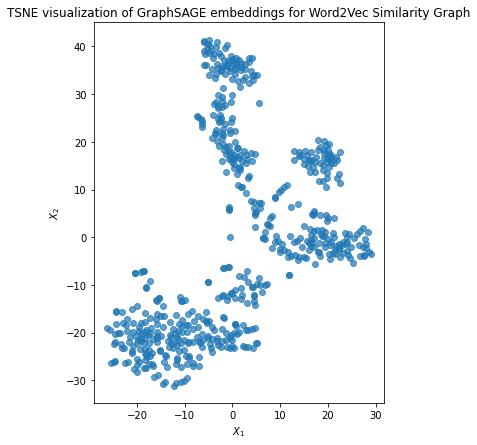

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    # c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_no_color")
plt.show()

In [ ]:
# map molecules -> molecule labels 
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}
label_dict

{'netrin': 1,
 'ephrin': 0,
 'laminin': 1,
 'tenascin': 0,
 'cspg': 0,
 'zymosan': 1,
 'camp': 1,
 'pten': 0,
 'cntf': 1,
 'lif': 1,
 'oncomodulin': 1,
 'stat3': 1,
 'socs3': 0,
 'rhoa': 0,
 'rock': 0,
 'y27632': 1,
 'nogo': 0,
 'klf': 1,
 'ngr': 0,
 'lar': 0,
 'tlr2': 1,
 'bdnf': 0,
 'igf1': 1,
 'opn': 1,
 'mag': 0,
 'omgp': 0,
 'kspg': 0,
 'taxol': 1}

In [ ]:
color_map = {0: "red", 1: "green"}

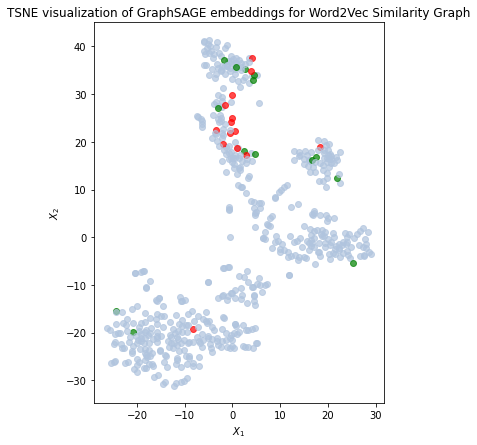

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  if molecule_name in label_dict:
    ax.scatter(row[1][0], row[1][1], c=color_map[label_dict[molecule_name]], alpha=alpha) 
  else:
    ax.scatter(row[1][0], row[1][1], c="lightsteelblue", alpha=alpha) 

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Known_Promoters_Inhibitors")
plt.show()

# Using Pre-Trained Bert to Classify Molecules


In [ ]:
# ## Model.py ## 

# !pip install transformers

# import transformers, torch
# import torch.nn as nn
# import torch.nn.functional as F

# tokenizer = transformers.RobertaTokenizerFast.from_pretrained("roberta-base")

# def _tokenize(st):
#     tokenized_st = tokenizer(
#         st,
#         max_length=64,
#         padding="max_length",
#         truncation=True,
#     )
#     return tokenized_st


# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device", DEVICE)


# class TrainingModel(nn.Module):
#     def __init__(self, num_classes):
#         super().__init__()
#         self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
#         self.linear = nn.Linear(self.encoder.config.hidden_size, num_classes)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, batch):
#         encoder_out = self.encoder(
#             input_ids=batch["input_ids"],
#             attention_mask=batch["attention_mask"],
#         )
#         logits = self.linear(encoder_out["pooler_output"])
#         output = self.softmax(logits)
#         result = {"output": output}
#         if "labels" in batch:
#             result["loss"] = F.cross_entropy(output, batch["labels"])
#         return result


# class InferenceModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
#         self.linear = nn.Linear(self.encoder.config.hidden_size, 2)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, tokenized_comment):
#         encoder_out = self.encoder(
#             input_ids = torch.as_tensor(tokenized_comment["input_ids"]).unsqueeze(0).to(DEVICE),
#             attention_mask = torch.as_tensor(tokenized_comment["attention_mask"]).unsqueeze(0).to(DEVICE),
#         )
#         logits = self.linear(encoder_out["pooler_output"])
#         return self.softmax(logits)


# class Predict:
#     def __init__(self, model_name):
#         self.model = InferenceModel()
#         self.model.load_state_dict(torch.load(model_name, map_location=DEVICE))
#         self.model = self.model.to(DEVICE)
#         self.model.eval()

#     def process_eval(self, s):
#         # s = strip_tags(s)
#         tokens = _tokenize(s)
#         return tokens


#     def predict(self, comment):
#         tokenized_comment = self.process_eval(comment)
#         with torch.no_grad():
#             logits = self.model(tokenized_comment)
#         confidence = float(logits[0][1])
#         return logits, confidence


In [ ]:
# p = Predict("/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/Supervised_10_epochs.pth") 

In [ ]:
# p.predict("socs3 is not a strong facilitator of the optic nerve")

In [ ]:
# bert_regen_score_dict_supervised = {} 

# molecules_double_spaced.remove(" no ")
# for counter, keyword in enumerate(molecules_double_spaced):
#   print(f"{counter} / {len(molecules)} Current keyword: " + keyword + "...")
#   keyword_regen_score = 0 
#   total_sentences_found = 0
#   for sentence in all_docs_1D:
#     if keyword in sentence:
#       to_add = p.predict(sentence)[1] 
#       keyword_regen_score += to_add
#       total_sentences_found += 1
  
#   if total_sentences_found == 0:
#     # redo but with no padding spaces around molecule
#     for sentence in all_docs_1D:
#       if keyword.strip() in sentence:
#         to_add = p.predict(sentence)[1] 
#         keyword_regen_score += to_add
#         total_sentences_found += 1

#   bert_regen_score_dict_supervised[keyword.strip()] = keyword_regen_score / total_sentences_found 
#   print("    Calculated score of {}".format(keyword_regen_score / total_sentences_found)) 

In [ ]:
# len(bert_regen_score_dict_supervised_one) + len(bert_regen_score_dict_supervised)

In [ ]:
# bert_regen_score_dict_supervised_total = {**bert_regen_score_dict_supervised, **bert_regen_score_dict_supervised_one}

In [ ]:
# import pickle 
# bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/all_molecules_bert_regen_score_dict_supervised_no_unlabeled.pkl"
# with open(bert_regen_scores_path, 'wb') as f:
#     pickle.dump(bert_regen_score_dict_supervised, f)

In [ ]:
stop_code 
# TO DO CHANGE PATH OF NEXT CELL TO ONE WITH THE TWO CLASSES!!! 

NameError: ignored

In [ ]:
# TO DO CHANGE PATH OF NEXT CELL TO ONE WITH THE TWO CLASSES!!! 
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes.pkl"
bert_regen_scores_loaded = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores_loaded = pickle.load(f)

In [ ]:
len(bert_regen_scores_loaded)

580

In [ ]:
bert_regen_scores_curated = {k.strip():v for k,v in bert_regen_scores_loaded.items()}
bert_regen_scores_curated

In [ ]:
bert_regen_scores_curated['no'] = np.array([0,0,0])

ValueError: ignored

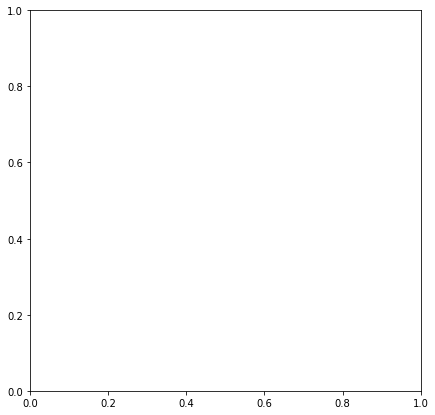

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  label = bert_regen_scores_curated[molecule_name]
  if label == -1:
    ax.scatter(row[1][0], row[1][1], c="black", alpha=alpha) 
  elif label < .5:
    ax.scatter(row[1][0], row[1][1], c="red", alpha=alpha) 
  elif label >= .5:
    ax.scatter(row[1][0], row[1][1], c="green", alpha=alpha) 
  else:
    raise Exception

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_sharp_cutoffs")
plt.show()

In [ ]:
s = pd.Series(bert_regen_scores_curated)
s.name = "Supervised Score"

In [ ]:
emb_transformed_score = emb_transformed.join(s)

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed_score[0],
    emb_transformed_score[1],
    c=emb_transformed_score['Supervised Score'],
    cmap="RdYlGn",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_gradient")
plt.show()

In [ ]:
stop_code

In [ ]:
len(emb_transformed)

In [ ]:
emb_transformed_two = emb_transformed.copy() 

In [ ]:
pd.Series(bert_regen_scores_curated)

In [ ]:
emb_transformed_two = emb_transformed_two.join(s)

In [ ]:
emb_transformed_two

In [ ]:
# unlabeled = [] 
# for k,v in bert_regen_scores_curated.items():
#   if v == -1:
#     unlabeled.append(k)

# unlabeled

In [ ]:
# emb_transformed_two = emb_transformed_two.drop(unlabeled)

In [ ]:
# alpha = 0.7

# fig, ax = plt.subplots(figsize=(7, 7))  
# ax.scatter(
#     emb_transformed_two[0],
#     emb_transformed_two[1],
#     c=emb_transformed_two['Supervised Score'],
#     cmap="RdYlGn",
#     alpha=alpha,
# )
# ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
# plt.title(
#     "{} visualization of GraphSAGE embeddings without Unlabeled for Word2Vec Similarity Graph".format(transform.__name__)
# )
# plt.savefig(f"{randn}: TSNE_gradient_without_unlabeled")
# plt.show()

# Plotting Word Embeddings

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # for word, (x,y) in zip(words, twodim):
        # plt.text(x+0.05, y+0.05, word)

In [ ]:
color_encoding = [bert_regen_scores_curated[m] for m in molecules]
color_encoding

In [ ]:
# node_subject = node_classifications

X = np.asarray(molecules_embedded)
if X.shape[1] > 2:
    transform = TSNE  
    trans = transform(n_components=2)
    word_emb_transformed = pd.DataFrame(trans.fit_transform(X), index=molecules)

word_emb_transformed

In [ ]:
word_emb_transformed = word_emb_transformed.join(s)
word_emb_transformed

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    word_emb_transformed[0],
    word_emb_transformed[1],
    c=word_emb_transformed['Supervised Score'],
    cmap="RdYlGn",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of Word Embeddings of Molecules".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Word_Embeddings")
plt.show()

# Classifying Promoters and Inhibitors by Lexicons

In [ ]:
lexiconDF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Lexicon.csv")
promoter_lexicon = list(lexiconDF['Promoter'].dropna())
inhibitor_lexicon = list(lexiconDF['Inhibitor'].dropna())

In [ ]:
inhibitor_lexicon

In [ ]:
from collections import defaultdict
molecule_lexicon_score = defaultdict(int)

total_sentences = len(all_docs_1D)
for counter, sentence in enumerate(all_docs_1D):
  found = False
  for m in molecules:
    if m in sentence:
      for p in promoter_lexicon:
        if p in sentence:
          molecule_lexicon_score[m] += 1
          print(f"{m} + 1 --> {p}")
          found = True 
      for i in inhibitor_lexicon:
        if i in sentence:
          molecule_lexicon_score[m] -= 1
          print(f"{m} - 1 --> {i}")
          found = True 
      
      if found:
          print(f"\t{counter}/{total_sentences}")
          found = False

molecule_lexicon_score

In [ ]:
label_map = {0: 'inhibitor', 1: 'promoter'}

In [ ]:
for m in orig_molecules:
  print(f"{m}: {molecule_lexicon_score[m]} ({label_map[label_dict[m]]})")

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for m in orig_molecules:
  molecule_label = label_dict[m]
  if molecule_label == 1:
    ax.scatter(m, molecule_lexicon_score[m], c='green', alpha=alpha) 
  else:
    ax.scatter(m, molecule_lexicon_score[m], c='red', alpha=alpha) 

# ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "Visualization of Lexicon Scores for Molecules"
)
plt.xticks(rotation=90)
plt.show()


# K Nearest Neighbors Word Embeddings

In [ ]:
len(molecules_embedded)

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(molecules_embedded, assign_clusters=True)
print (assigned_clusters)

In [ ]:
for m in molecules:
  print(f"{m}: {label_dict[m]} {assigned_clusters[molecules.index(m)]}")

In [ ]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(molecules_embedded)
 
assigned_clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (assigned_clusters)

In [ ]:
for m in orig_molecules:
  print(f"{m}: {label_dict[m]} {assigned_clusters[molecules.index(m)]}")

# Previous Work

In [ ]:


keyword_dict = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
#keywords = ["nucleus"]
for keyword in keywords:
  found_sentences = [] 

  for sentence in all_docs_1D:
    if keyword in sentence:
      found_sentences.append(sentence)

  counter = 0
  for sentence in found_sentences:
    if any(word in sentence for word in causal_verbs):
      # print("-> " + sentence)
      counter += 1

  to_append = [str(int(counter/len(found_sentences) * 100)) + "%", int(counter), int(len(found_sentences))]
  keyword_dict[keyword] = to_append
  print("{} {}/{}: {}".format(keyword, counter, len(found_sentences), counter / len(found_sentences)))

In [ ]:
import pandas as pd 
df = pd.DataFrame(keyword_dict)
df = df.T # flip columns with rows 
df.columns = ["% sentences with causal verb", "sentences with molecule and causal verb", "total sentences with molecule"]

In [ ]:
df